In [37]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
data = pd.read_csv('bodyfat.csv')
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


## Primeiramente realizar uma análise manual dos dados para entender a estrutura básica dele, como:
* Dimensão do dataframe, se existem valores nulos/NaN
* Obter um resumo estatístico dos dados: média, mediana, máximo, mínimo, quartis, etc...

#### Verificando as dimensões do DataFrame e a existência de dados nulos/NaN

In [10]:
dim = data.shape
na_values = data.isna().sum().sum()
print(f'O data frame possui {dim[0]} linhas, {dim[1]-1} variáveis independentes (X) e {dim[1]-(dim[1]-1)} variável dependente (Y) que será a variável que queremos prever.\n\
Ao total temos {na_values} dados nulos.')

O data frame possui 252 linhas, 14 variáveis independentes (X) e 1 variável dependente (Y) que será a variável que queremos prever.
Ao total temos 0 dados nulos.


#### As variáveis que compoem o grupo X são:
* $x_1$: Density
* $x_2$: Age
* $x_3$: Weight
* $x_4$: Height
* $x_5$: Neck
* $x_6$: Chest
* $x_7$: Abdomen
* $x_8$: Hip
* $x_9$: Thigh
* $x_{10}$: Knee
* $x_{11}$: Ankle
* $x_{12}$: Biceps
* $x_{13}$: Forearm
* $x_{14}$: Wrist
#### Prtanto, Y será:
* BodyFat

In [56]:
#descrição dos dados
data.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [20]:
#separando dataframe em X e Y
X = data.drop(columns=['BodyFat'], axis=1)
Y = data.BodyFat
print(f'variaveis X: {X.columns}\n\
variáveis Y: {Y.name}')


variaveis X: Index(['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip',
       'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'],
      dtype='object')
variáveis Y: BodyFat


In [42]:
# criando o primeiro modelo utilizando todas as variáveis de X
# sempre utilizando o tamanho de teste em 30%
SEED = 123456
np.random.seed(SEED)

x_train1, x_test1, y_train1, y_test1 = train_test_split(X,Y,test_size=0.3)

model_1 = LinearRegression()
model_1.fit(x_train1, y_train1)
accuracy_1 = model_1.score(x_test1, y_test1)
print(round(accuracy_1 *100,2))

99.05


<AxesSubplot:xlabel='Weight', ylabel='BodyFat'>

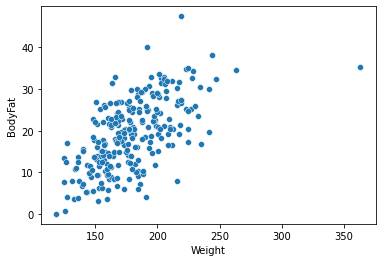

In [40]:
#como o modelo deu m valor muito aproximado de 1, entao iremos realizar  a análise gráfica
sns.scatterplot(x='Weight', y='BodyFat', data=data)

#### É possível ver, baseado no gráfico a cima, que o percentual de gurdura tem uma relação com peso.


### Sabendo que o modelo ja nos retornou uma acurácia ótima para prever o percentual de gordura, podemos agora, tentar verificar se, retirando algumas variáveis, conseguimos ter uma acurácia próxima da que ja obtivemos.
#### Primeiramente vamos verificar quais variáveis de X tem uma correlaçaõ forte com Y.

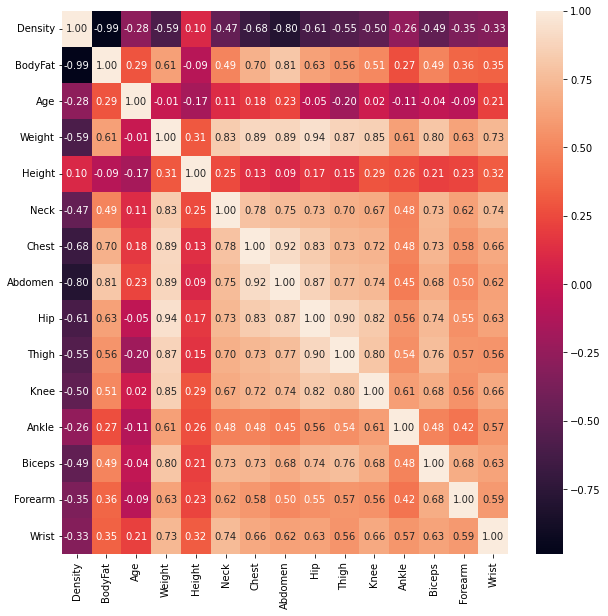

In [50]:
#gerando uma matriz de correlação e um gráfico de calor
corr_matrix = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f")
plt.show()

#### Utilizaremos o critério de utilizar variáveis com correlação >= 0.6 absoluto com  Y:
* Density
* Weight
* Chest
* Abdomen
* Hip

In [61]:
#criando o novo conjunto X
np.random.seed(SEED)
NEW_X  = data[['Density', 'Weight','Chest', 'Abdomen', 'Hip']]
x_train2, x_test2, y_train2, y_test2 = train_test_split(NEW_X, Y, test_size = 0.3)

reduced_model = LinearRegression()
reduced_model.fit(x_train2,y_train2)
accuracy_2 = reduced_model.score(x_test2,y_test2)
print(round(accuracy_2*100,2))

99.21


### Como podemos ver, o modelo com menos variáveis, teve uma leve melhora, com uma diferença de 0,16 positivo (model_1 accuracy = 99.05%, reduced_model accuracy = 99.21%), ou seja, como os dois modelos tem uma acurácia muito próxima, podemos optar a utilizar o modelo reduzido, e coletar menos informação para obter o mesmo resultado.